# Assignment 1:









# Target Problem:


<span style="font-weight:700;font-size:20px">
    Diabetes Detection at an Early Stage in Women
</span>





## Business Case:
<span style="font-weight:500;font-size:20px"> 
The business case is to develop a machine learning sytem for early detection of diabetes in patients based on their health records and demographic infromation. This system aims to assist healthcare providers in identifying individuals at risk of diabetes, allowing for timely interventions and improved patient outcomes.  
</span>

## Dataset:
<span style="font-weight:500;font-size:20px">
    This dataset is taken from <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data">Kaggle</a> which was originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. This dataset is a raw dataset, meaning it requires preprocessing and feature engineering. </span>

## Machine Learning Problem and Evaluation Metric to be used:
<span style="font-weight:500;font-size:20px">The machine learning problem is binary classification, where the objective is to classify individuals as either "diabetic"(positive class) or "non-diabetic"(negative class) based on their features and historical health data. The average cross-validation score,accuracy, precision, recall, f-1 score,recall and support serve as  metric to ensure that the model performs well on unseen data. </span>



# ML Workflow



   ## Model Requirements:
   
   <ul>
  <li>Data Collection</li>
  <li>Feature Engineering</li>
  <li>Model Selection</li>
  <li>Hyperparameter Tuning</li>
            <li>Cross Validation</li>
            
            
  <li>Performance metric</li>
            <li>Interpretability</li>
            <li>Ethical Compilance</li>
            <li>Documentation</li>
            <li>Scalability</li>
</ul>
    
</span>


## Importing the Libraries


In [3]:
# Data wrangling
import pandas as pd
# Computational operations
import numpy as np  

# For ploting graph / Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing, Model, Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.simplefilter("ignore")



## Loading the dataset


In [4]:
# Read the csv file
diab = pd.read_csv("diabetes.csv")
# Display the first few rows of the DataFrame for initial data exploration
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Get the dimensions of the DataFrame (rows, columns)
diab.shape

(768, 9)

In [6]:
# Get a summary of the DataFrame's information including data types, non-null counts, and memory usage
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Count the number of duplicate rows in the DataFrame
diab.duplicated().sum()

0

In [8]:
# Generate summary statistics for the 'diab' DataFrame
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

### Analyzing Column Distributions

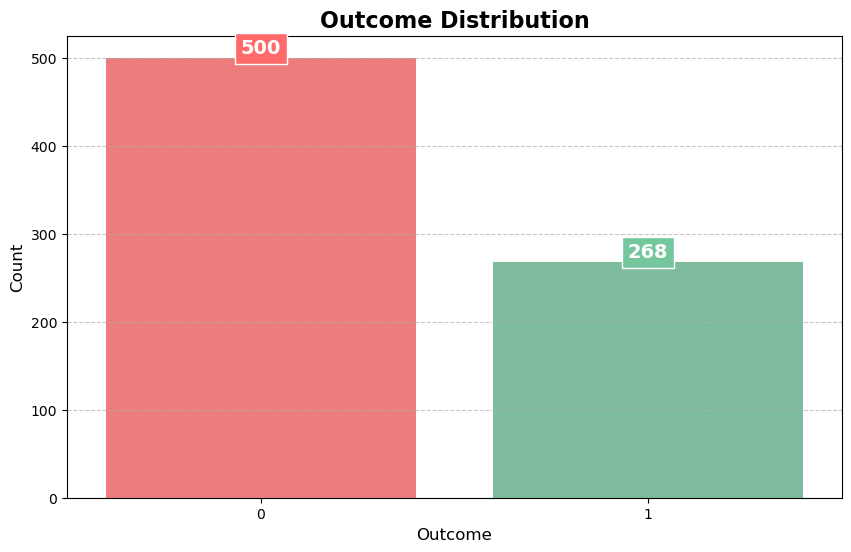

In [9]:
outcome_count = diab['Outcome'].value_counts()

bar_colors = ['#FF6B6B', '#74C69D']  
text_box_colors = ['white', 'white']  
plt.figure(figsize=(10, 6))
sns.barplot(x=outcome_count.index, y=outcome_count.values, palette=bar_colors)
plt.title('Outcome Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, count in enumerate(outcome_count):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=14, fontweight='bold', color='white', bbox=dict(facecolor=bar_colors[i], edgecolor=text_box_colors[i], boxstyle='square'))

plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

The above graph illustrates the counts for the outcomes in the dataset.

## Box plot for features

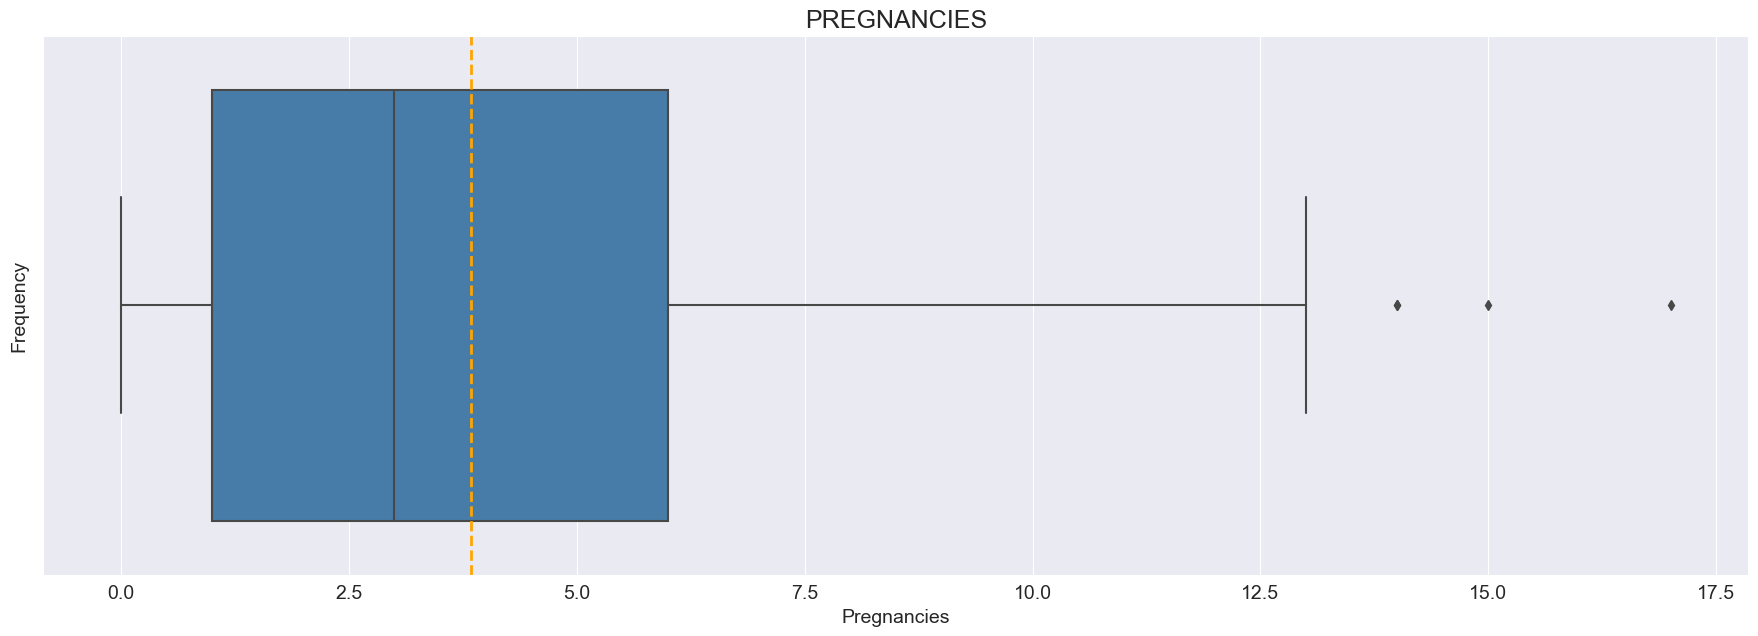

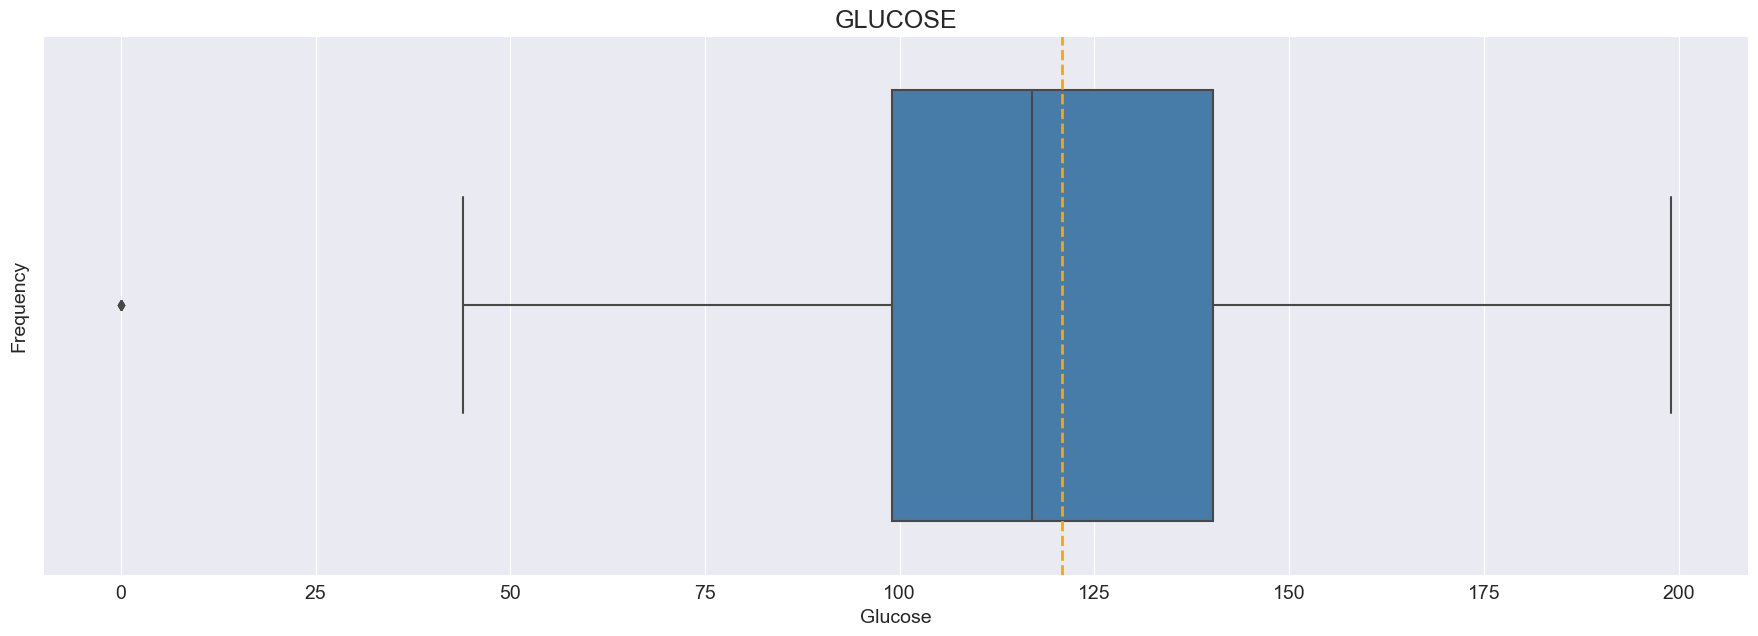

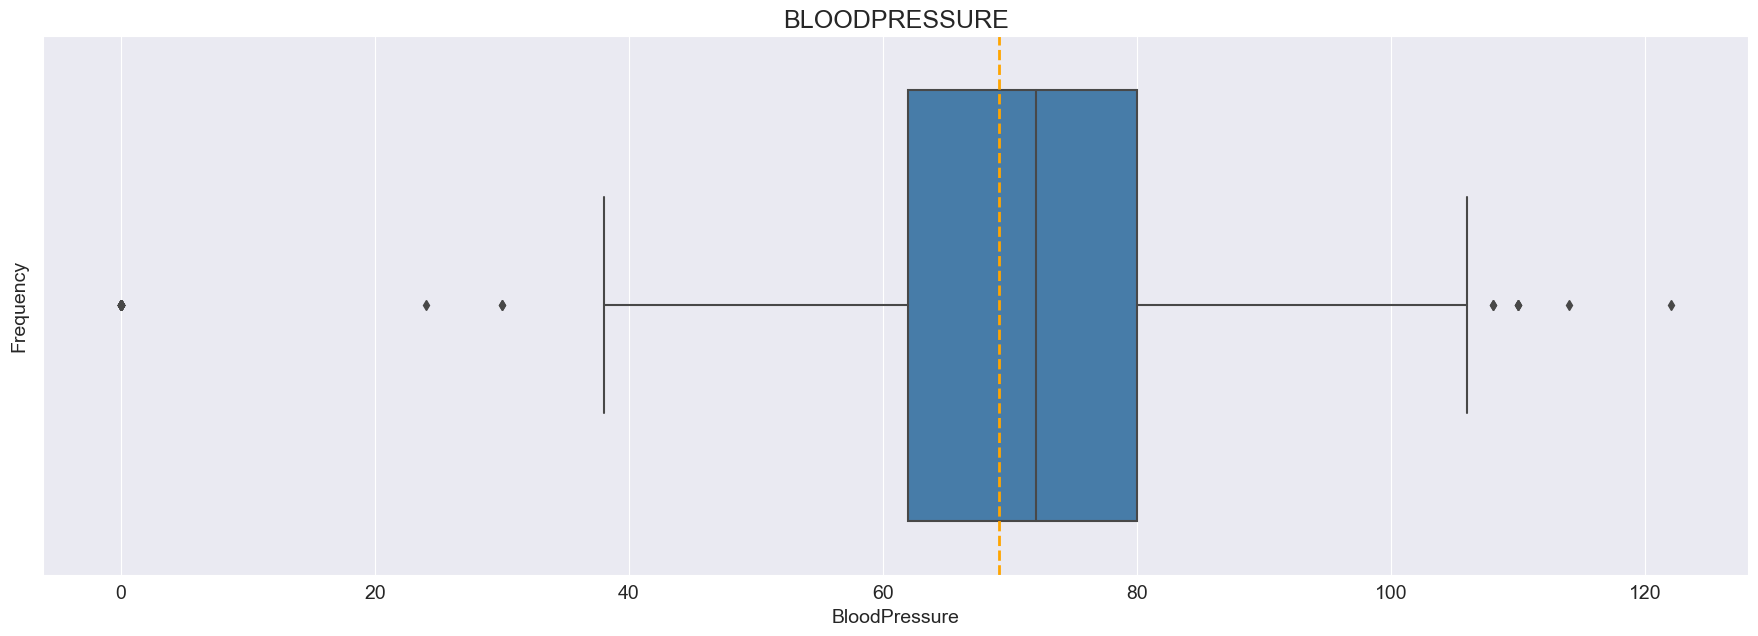

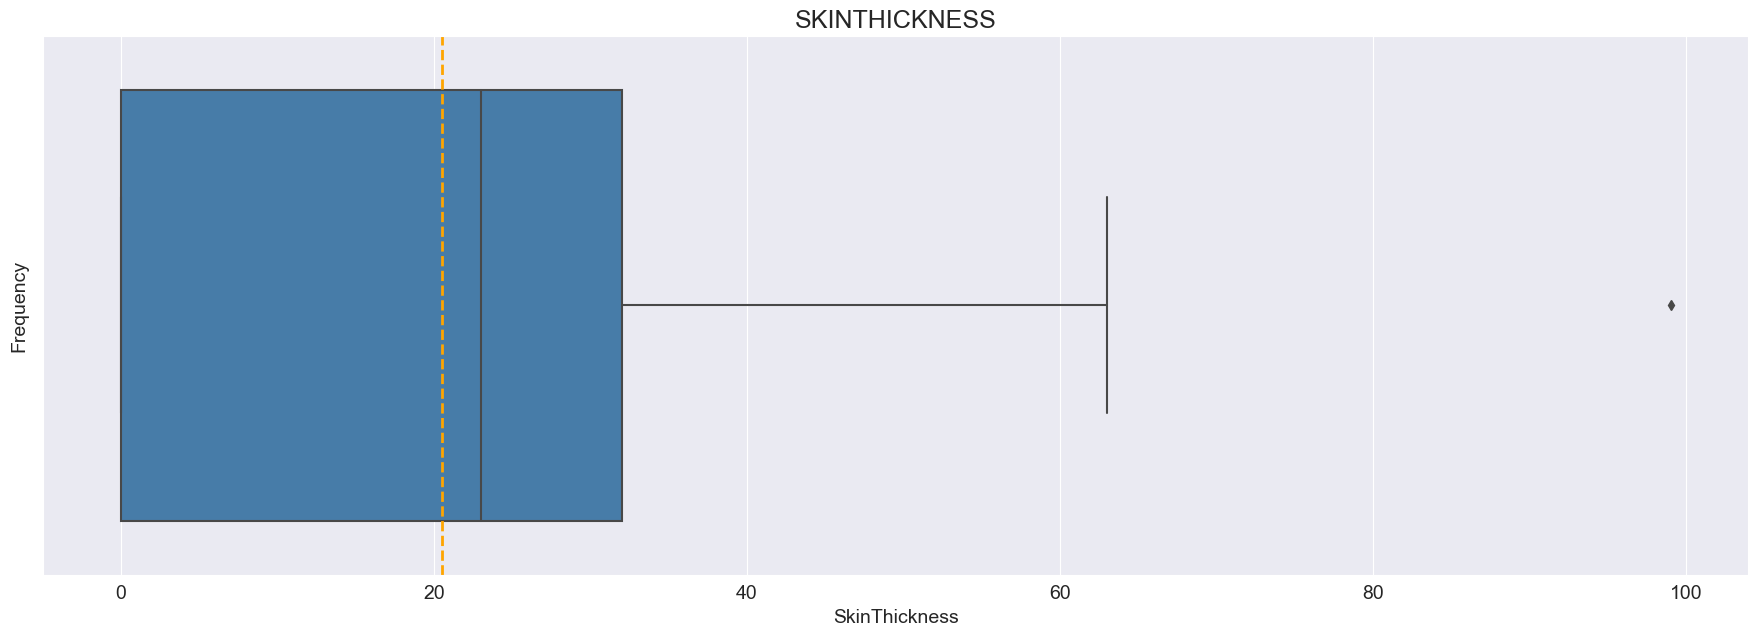

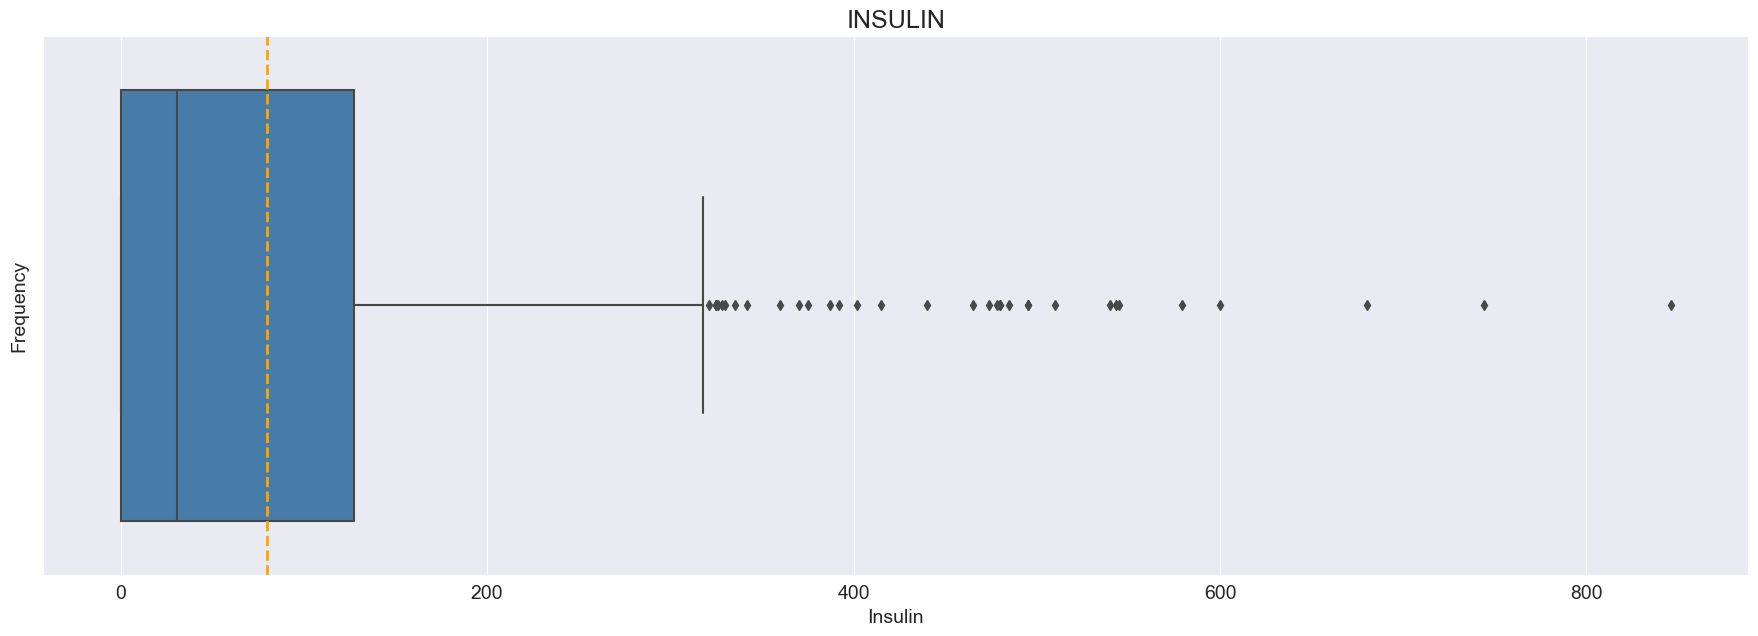

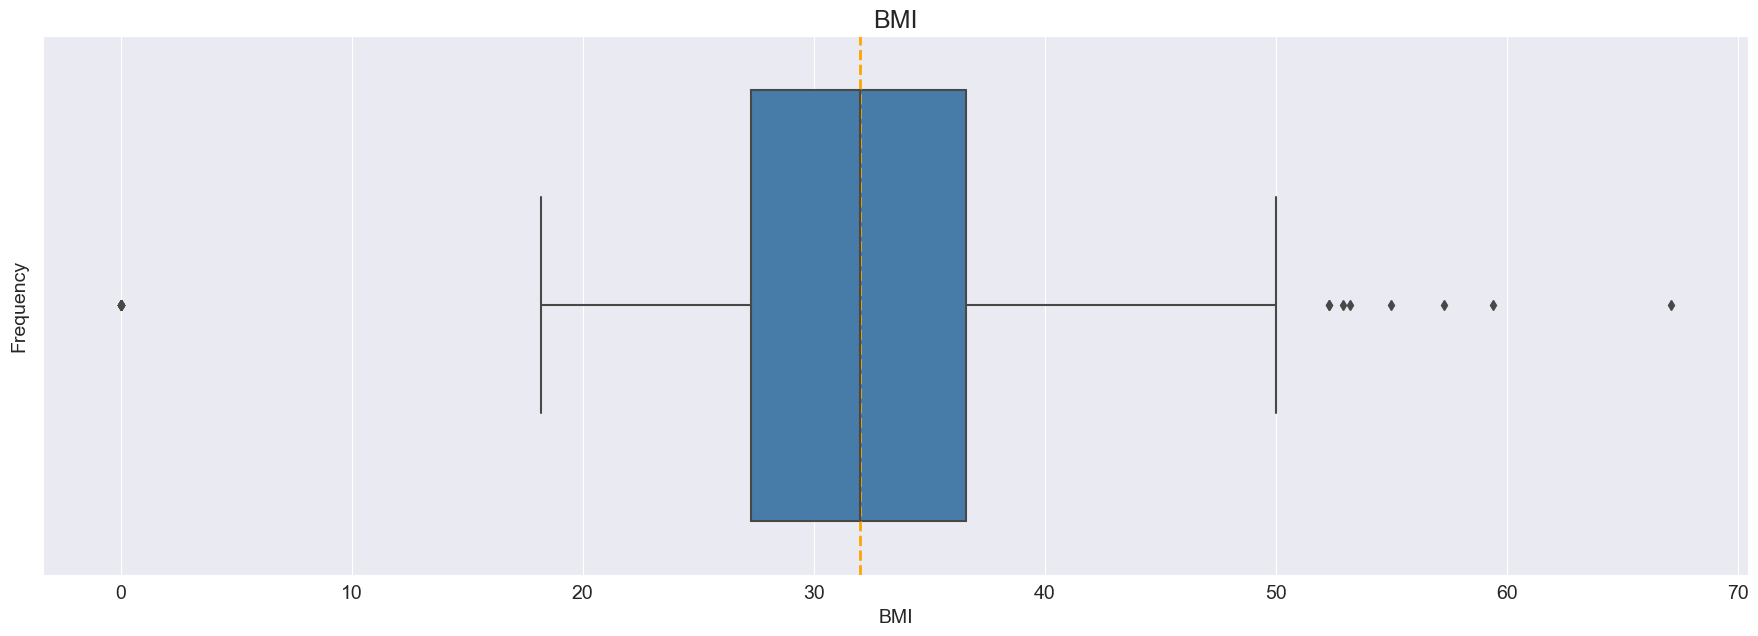

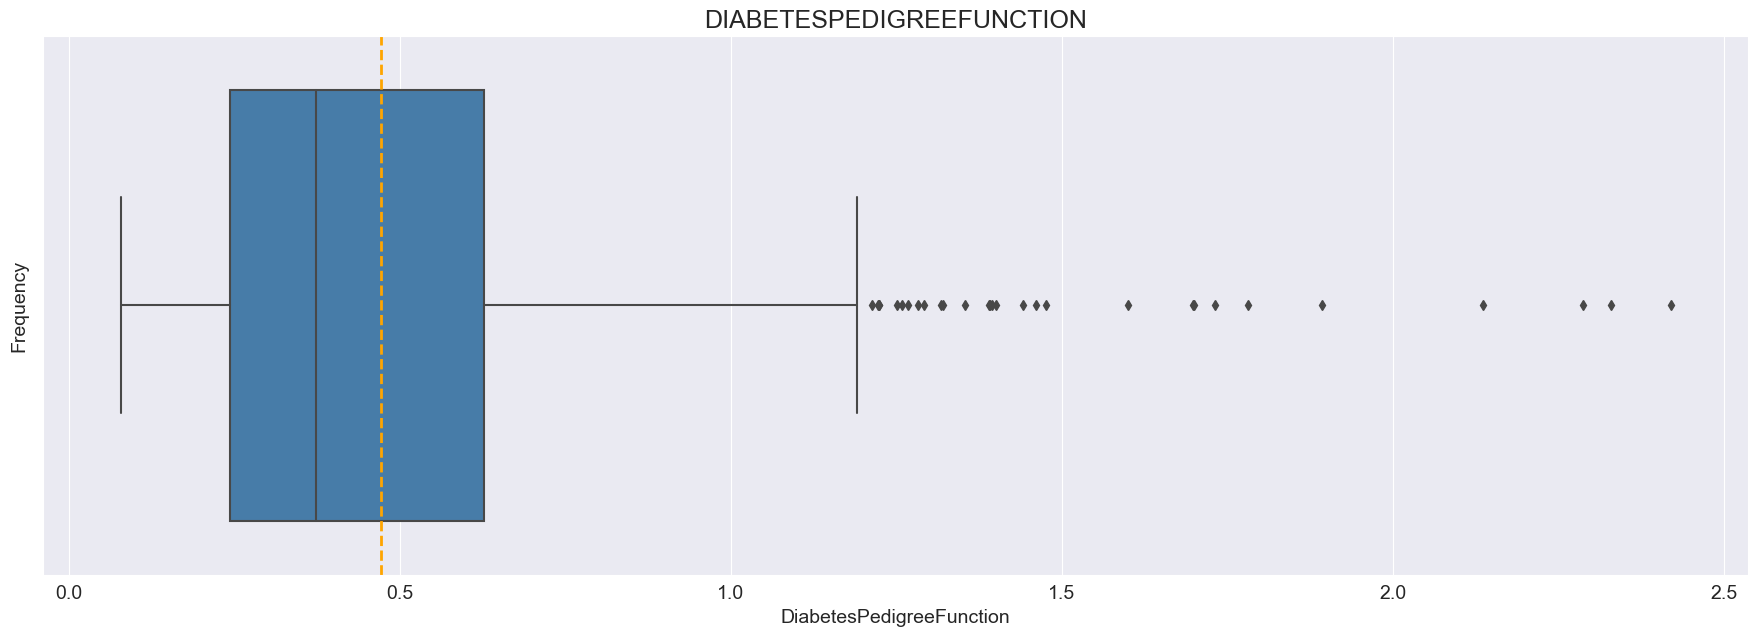

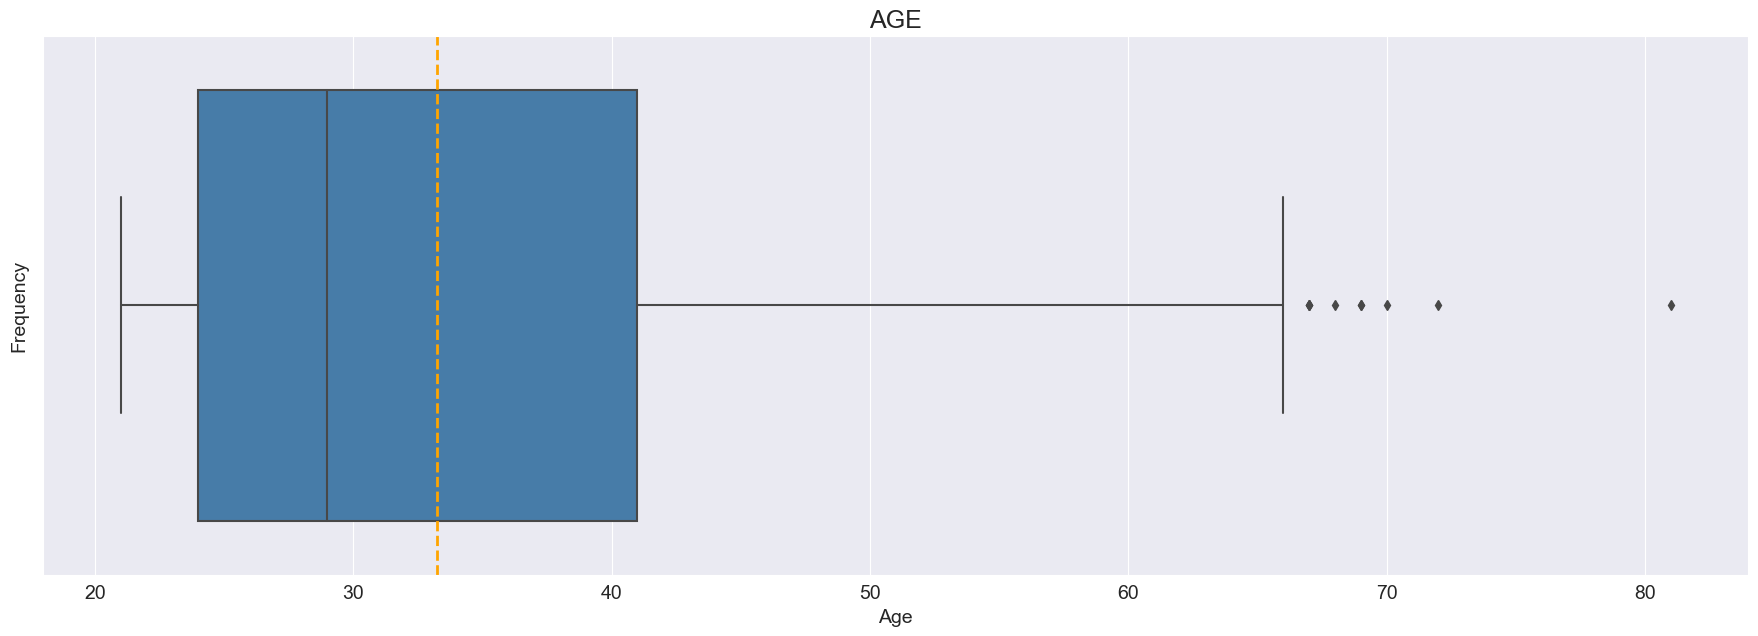

In [10]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 7)
plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")
palette = sns.color_palette("Set1")
for col in diab.columns[:-1]:
    ax = sns.boxplot(data = diab, x = col,  color=palette[1])
    plt.axvline(diab[col].mean(), linestyle='--', lw=2, zorder=1, color='orange')
    plt.title(col.upper(), fontsize=18)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

The above figures represent the box plot for all the features and also the mean distribution of each.

## Histograms for Features

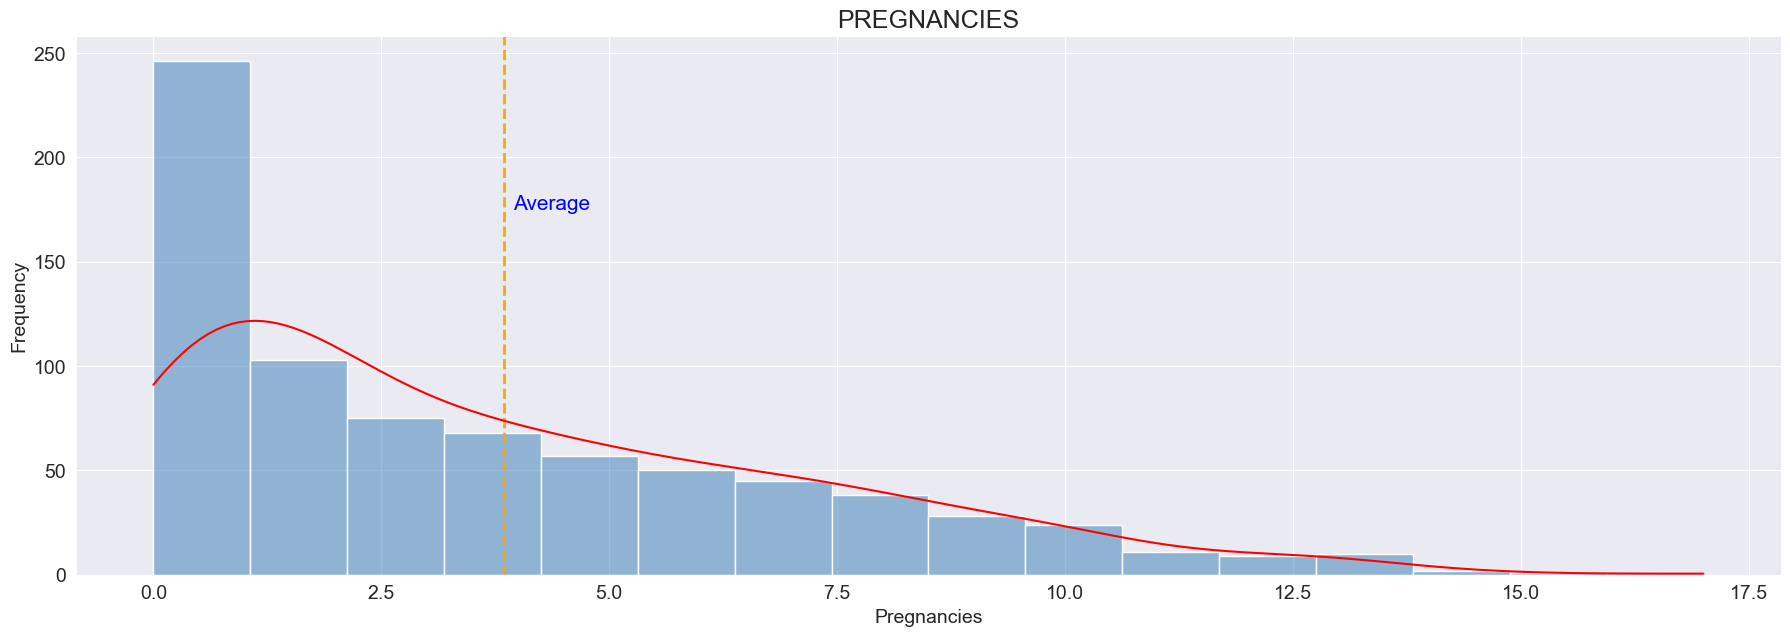

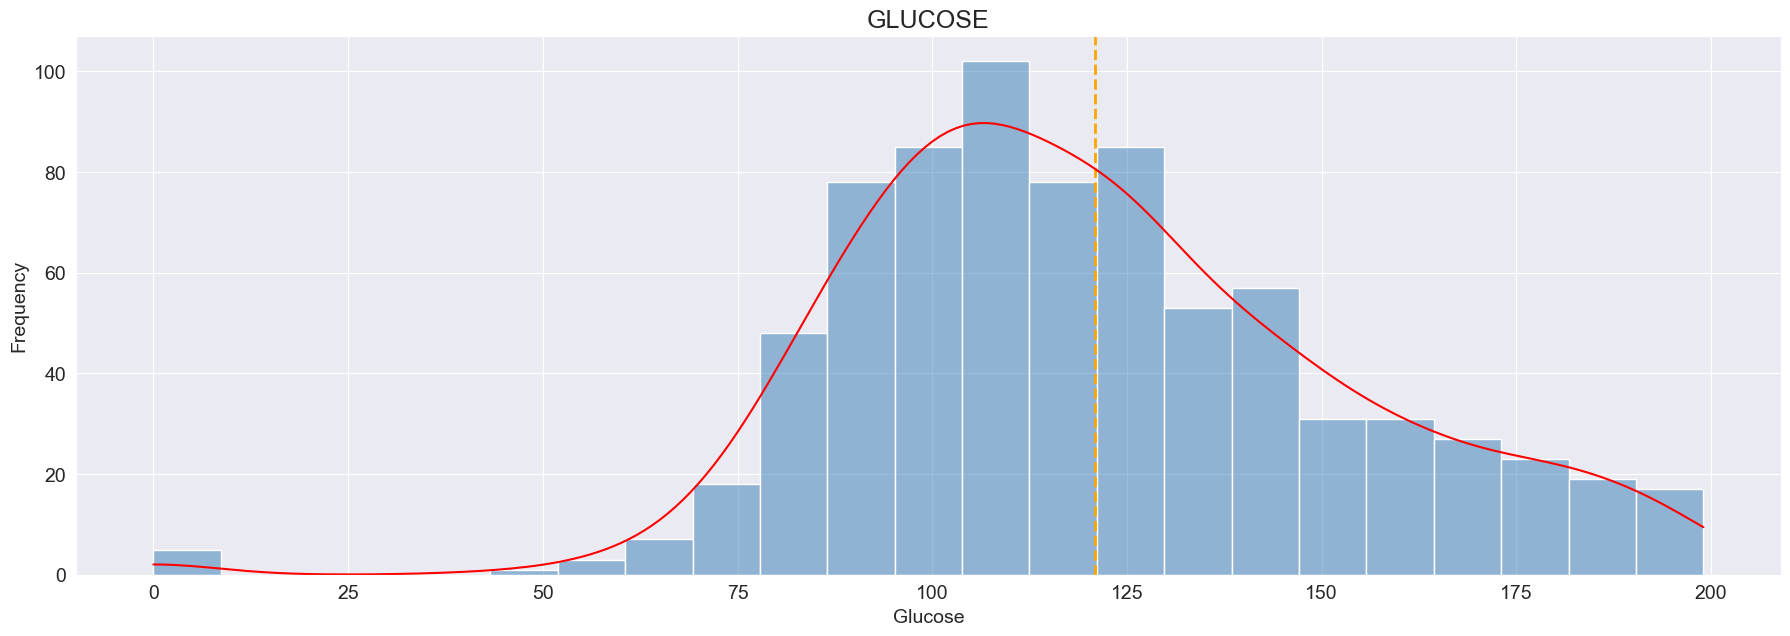

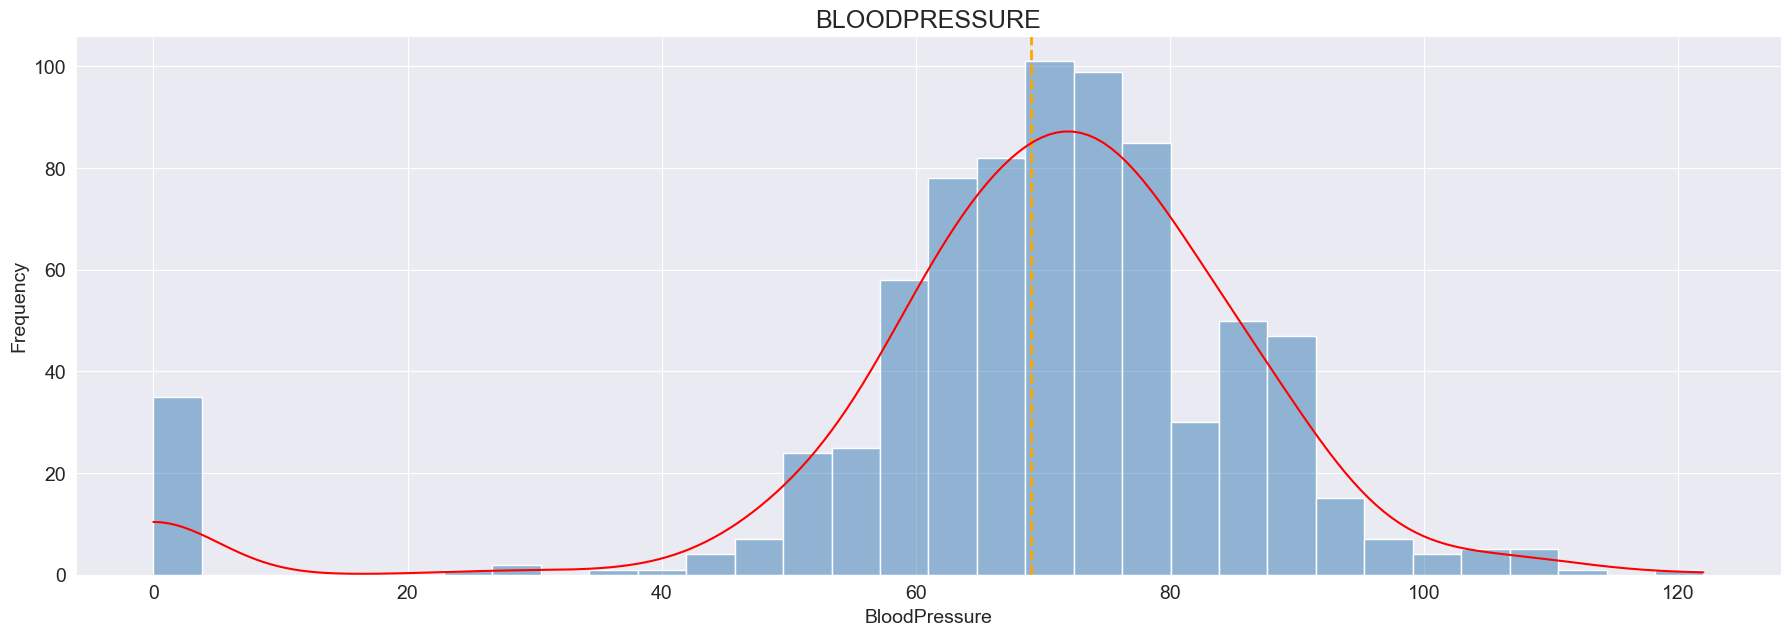

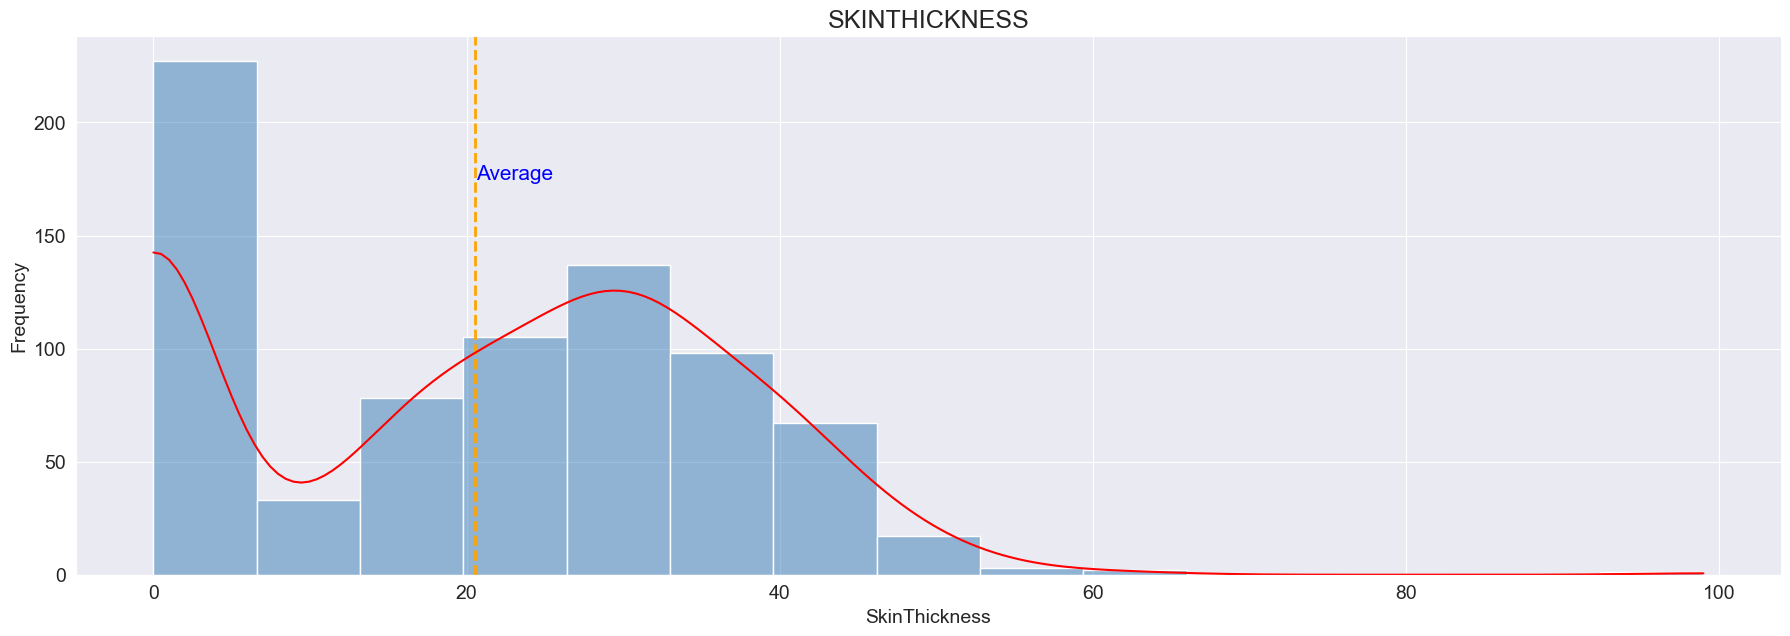

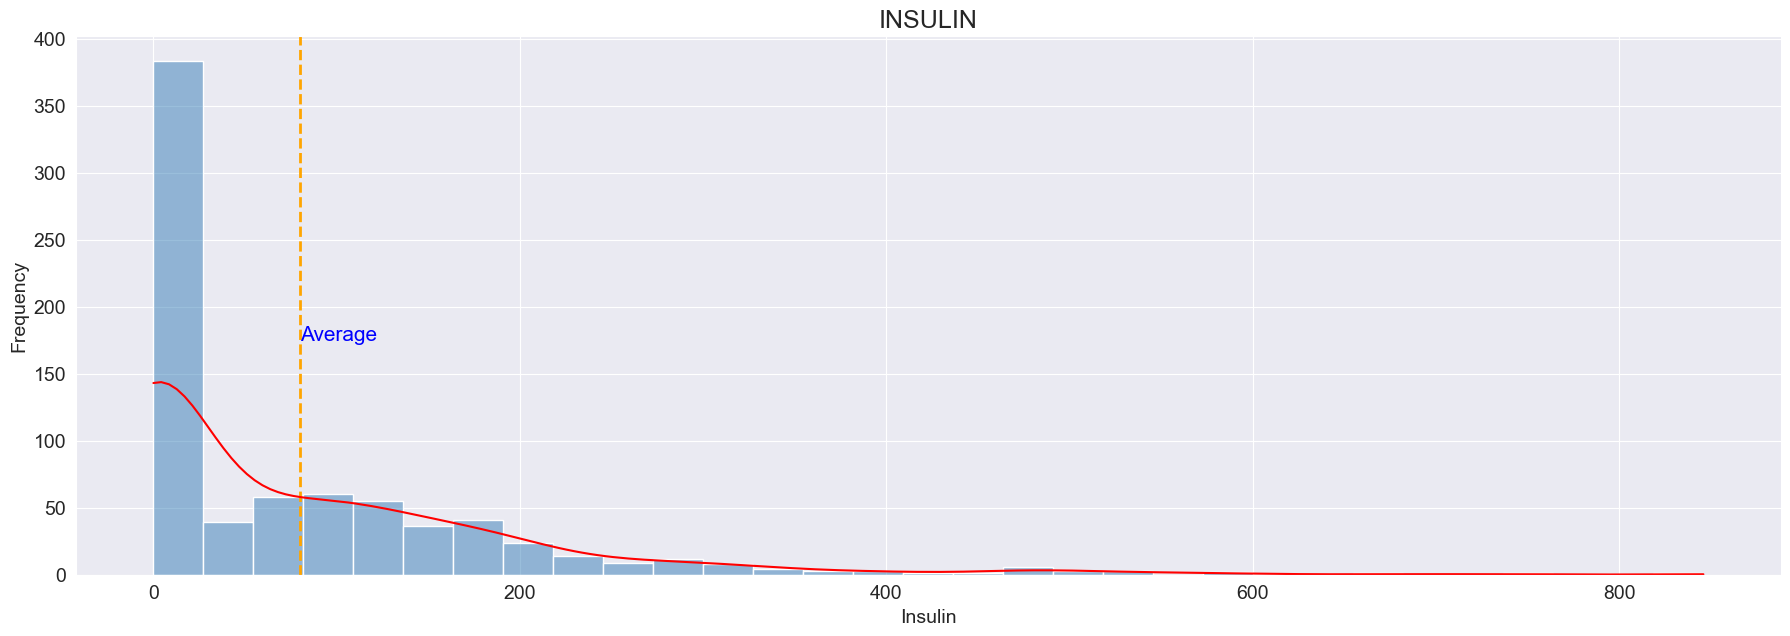

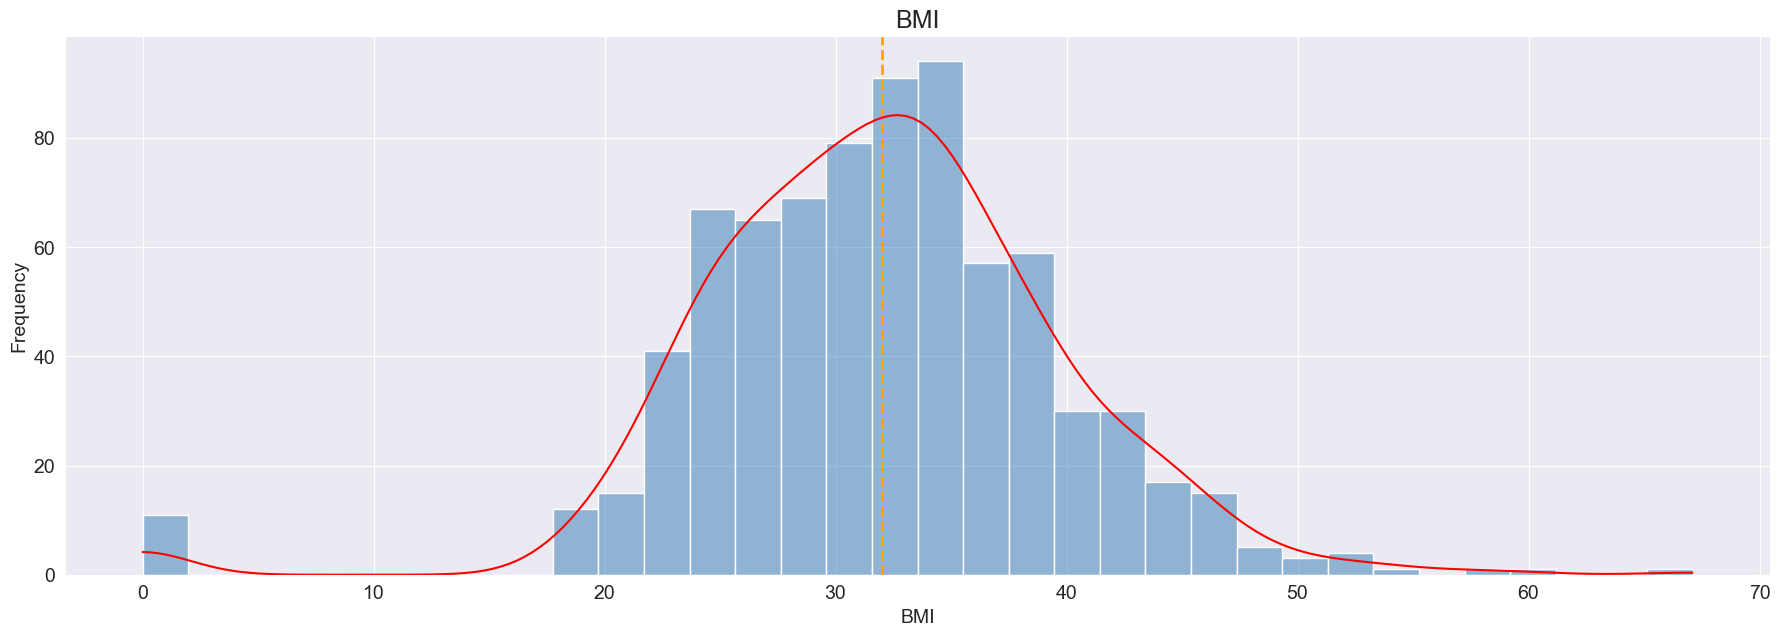

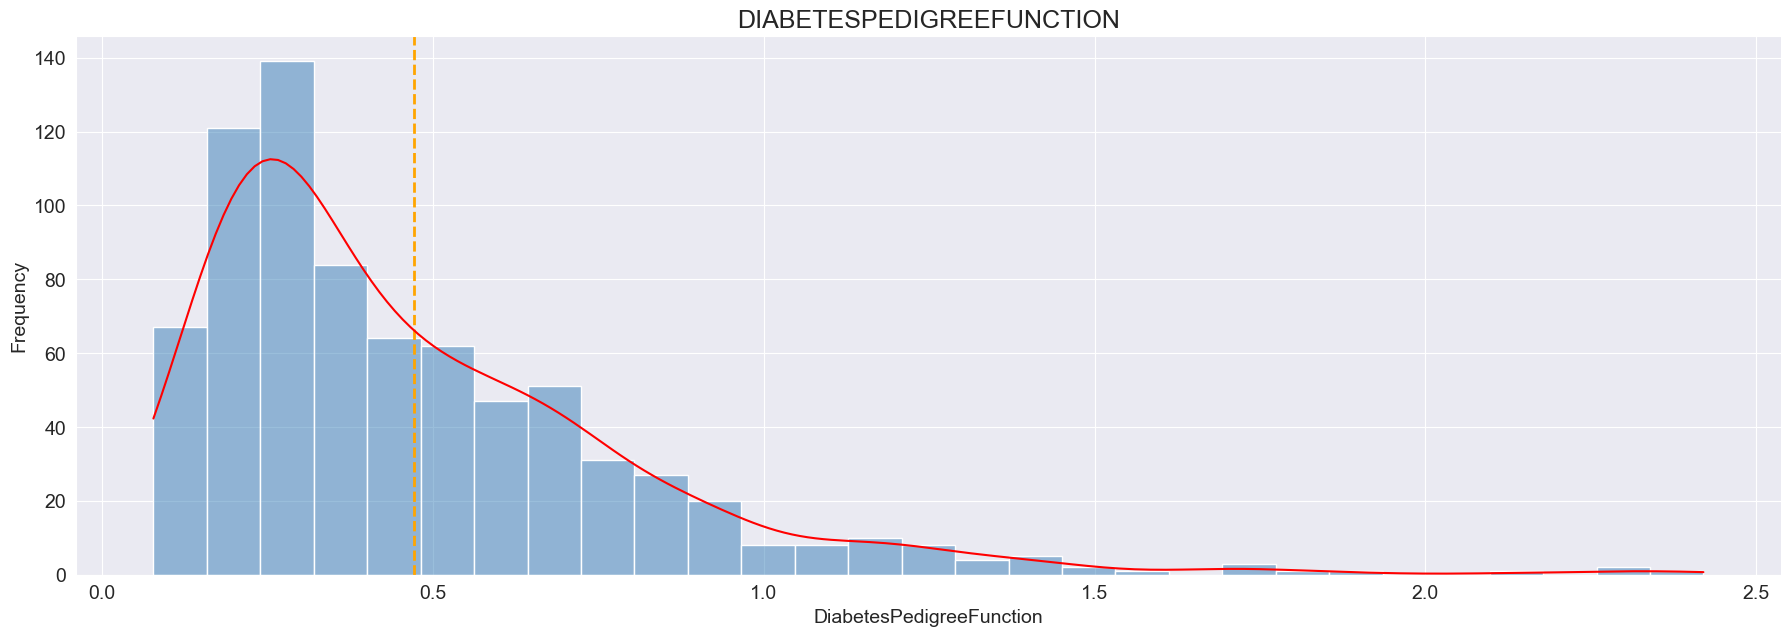

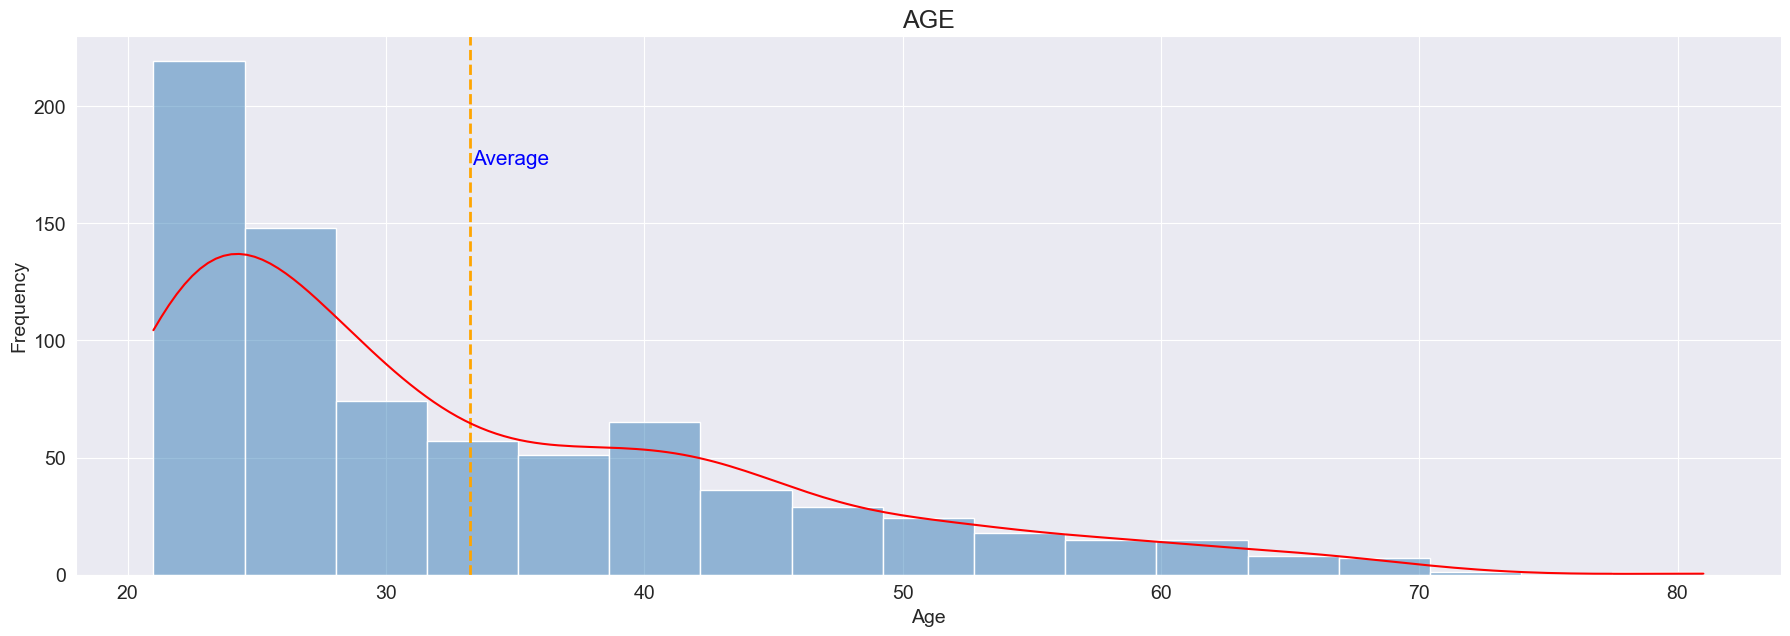

In [11]:
for col in diab.columns[:-1]:
    ax = sns.histplot(data = diab, x = col, kde = True, color=palette[1])
    ax.lines[0].set_color('red')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.axvline(diab[col].mean(), linestyle='--', lw=2, zorder=1, color='orange')
    plt.annotate(f'Average', (diab[col].mean()+0.1, 175), fontsize=15, color='blue')
    plt.title(col.upper(), fontsize=18)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

 The above histograms shows the frequency of each feature of the dataset along with the average of each of them. 

## Correlation Matrix 

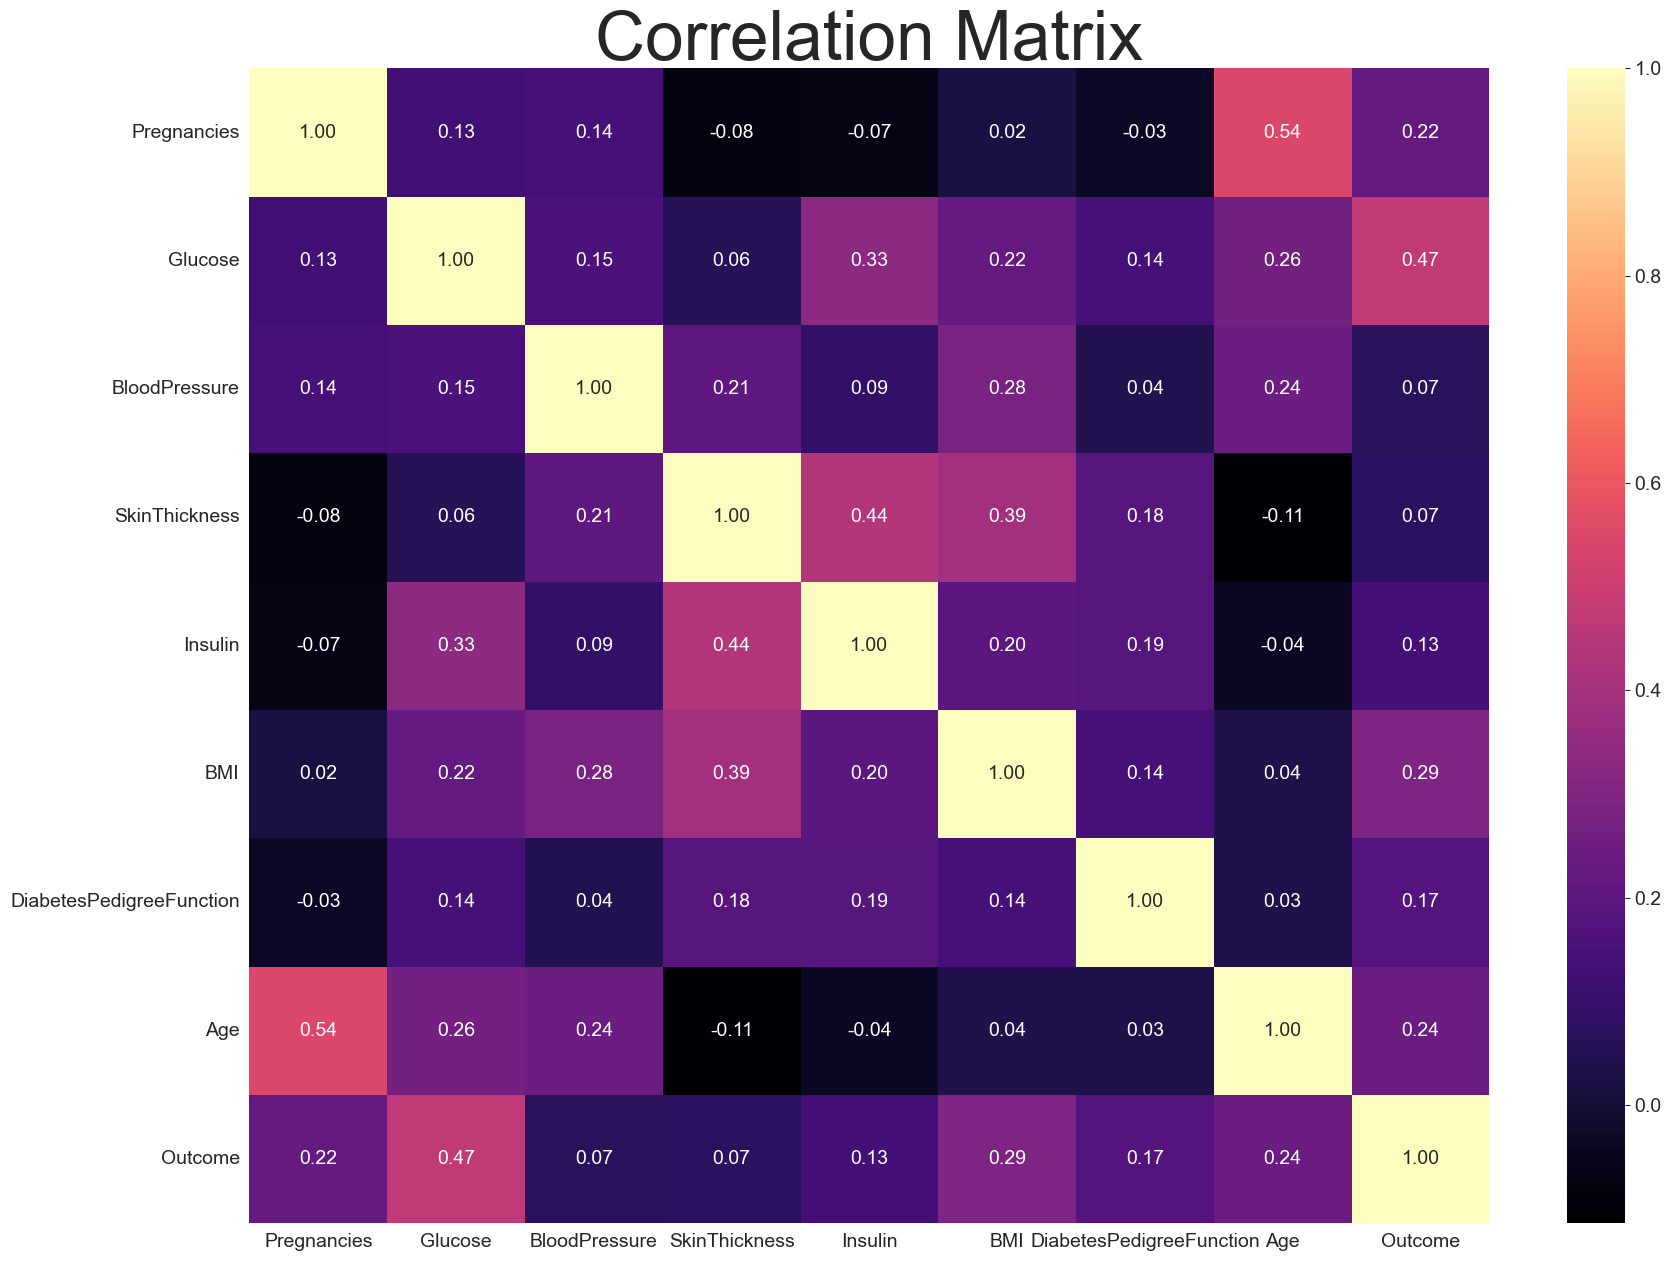

In [15]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(diab.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=50)
plt.show()

In [16]:
diab.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Conclusion
If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
Correlation = 0 means no correlation.
If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
These variables are Glucose. As these increase, Outcome variable increases.

## Data Cleaning

## Dealing with Missing Values

In [17]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
diab[columns_to_replace] =diab[columns_to_replace].replace(0, np.nan)
diab.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
fill_with_median = ['Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
fill_with_mean = ['BloodPressure', 'BMI']
for col in fill_with_median:
    median_value = diab[col].median()
    diab[col].fillna(median_value, inplace = True)

for col in fill_with_mean:
    mean_value = diab[col].mean()
    diab[col].fillna(mean_value, inplace = True)

## Dealing with Outliers

In [19]:
# Calculate IQR, lower bound, and upper bound for all columns in the dataset
Q1 = diab.quantile(0.25)
Q3 = diab.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = pd.Series(False, index=diab.index)
for col in diab.columns:
    is_outlier = (diab[col] < lower_bound[col]) | (diab[col] > upper_bound[col])
    outlier_mask |= is_outlier

diab_no_outliers = diab[~outlier_mask]
diab_no_outliers.skew()

Pregnancies                 0.511869
Glucose                     0.539863
BloodPressure               0.196540
SkinThickness              -0.110164
Insulin                    -0.324861
BMI                         0.424330
DiabetesPedigreeFunction    1.189008
Age                         0.849856
Outcome                     0.549622
dtype: float64

## Data Labelling
The data labelling is not required to be done in this dataset because data is already labelled. 

## Feature Engineering


In [34]:


#  BMI Grouping
data['BMI_Group'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

# Age Binning
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 25, 45, 65, np.inf], labels=['Young', 'Middle-aged', 'Elderly', 'Senior'])

# Pregnancy History Categorization
data['Pregnancy_Cat'] = np.where(data['Pregnancies'] > 0, 'Multiparous', 'Nulliparous')

# 4. Glucose-Insulin Interaction
data['Glucose_Insulin'] = data['Glucose'] * data['Insulin']

# 5. Blood Pressure Grouping
data['BloodPressure_Group'] = pd.cut(data['BloodPressure'], bins=[0, 80, 90, np.inf], labels=['Low', 'Normal', 'High'])

# 6. Age and BMI Interaction
data['Age_BMI_Interact'] = data['Age'] * data['BMI']

# 7. Feature Scaling 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the modified dataset
print(data.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome      BMI_Group    Age_Group  \
0                     0.627   50        1          Obese      Elderly   
1                     0.351   31        0     Overweight  Middle-aged   
2                     0.672   32        1  Normal Weight  Middle-aged   
3                     0.167   21        0     Overweight        Young   
4                     2.288   33        1          Obese  Middle-aged   

  Pregnancy_Cat  Glucose_Insulin BloodPressure_Group  Age_BMI_Interact  
0   Multiparous                0                 Low   

Feature engineering techniques such as BMI and age binning, categorization of pregnancy history, interaction feature creation for glucose and insulin, and blood pressure binning. These transformations aim to capture nonlinear relationships, simplify the data, and reveal hidden patterns, ultimately enhancing the dataset's suitability for machine learning models, particularly in predicting diabetes.

## Train the Model


In [39]:
X = diab_no_outliers.drop('Outcome', axis=1) 
y = diab_no_outliers['Outcome'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a StandardScaler to the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=21) 
clf.fit(X_train_scaled, y_train)
y_pred_test = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

## Evaluate the Model using Metric


In [40]:
# Evaluate the model as before
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report = classification_report(y_test, y_pred_test)
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)

# Print the evaluation metrics
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print('-' * 30)
print(f"Accuracy Test: {accuracy_test:.2f}")
print(f"Accuracy Train: {accuracy_train:.2f}")
print('-' * 30)
print(f" Test Confusion Matrix: \n {conf_matrix_test}")
print('-' * 30)
print(f" Train Confusion Matrix: \n {conf_matrix_train}")
print('-' * 30)
print(f"Classification Report: \n {class_report}")

Cross-Validation Scores: [0.68333333 0.8        0.75       0.66666667 0.73333333]
Mean Accuracy: 0.7266666666666667
------------------------------
Accuracy Test: 0.77
Accuracy Train: 1.00
------------------------------
 Test Confusion Matrix: 
 [[40  6]
 [11 18]]
------------------------------
 Train Confusion Matrix: 
 [[191   0]
 [  0 109]]
------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        46
           1       0.75      0.62      0.68        29

    accuracy                           0.77        75
   macro avg       0.77      0.75      0.75        75
weighted avg       0.77      0.77      0.77        75

